In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# 1. Exploratory Data Analysis

# 2. Clustering

## 2.1 Load Data

In [81]:
df0 = pd.read_excel('data-input.xlsx')
df1 = df0[['Net Income Growth','ROA','ROE','Category']]
df1.describe()

,Net Income Growth,ROA,ROE,Category
count,51.000000,51.00000,51.000000,0.0
mean,-399.818039,2.49549,-0.017647,NaN
std,2189.033208,16.03135,37.892002,NaN
min,-15358.190000,-88.45000,-140.130000,NaN
25%,-76.805000,0.63500,1.495000,NaN
50%,-25.540000,4.47000,5.850000,NaN
75%,10.255000,7.72500,10.970000,NaN
max,492.900000,44.84000,145.090000,NaN


<AxesSubplot:xlabel='Emiten', ylabel='Net Income Growth'>

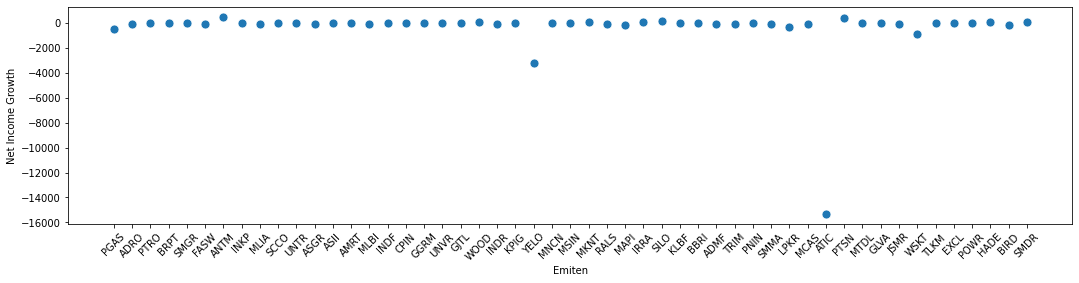

In [3]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Net Income Growth', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='ROA'>

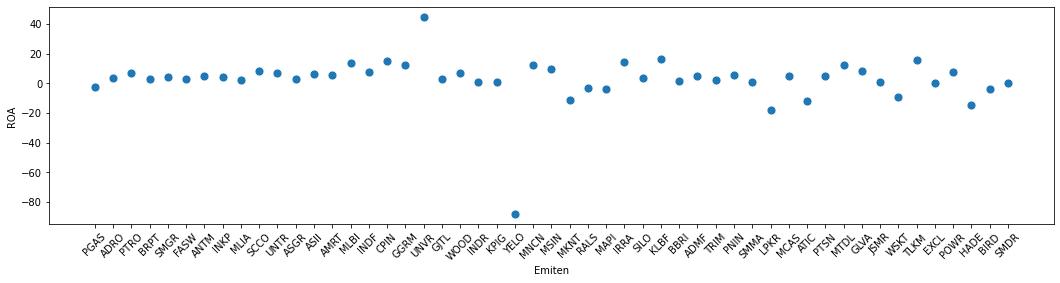

In [4]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='ROA', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='ROE'>

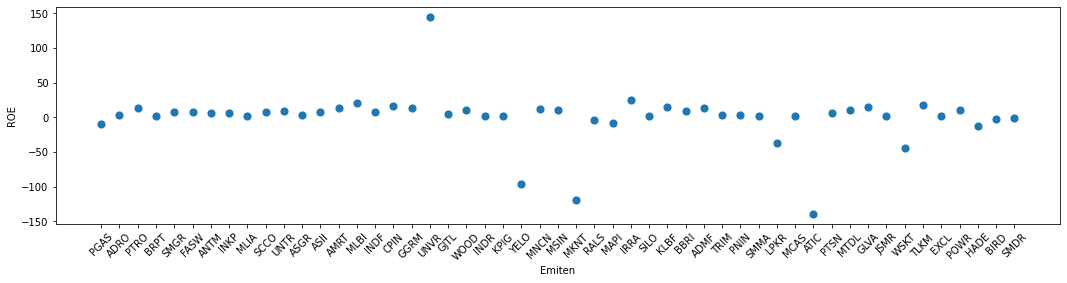

In [5]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='ROE', 
                data=df0, s=80)

## 2.2 Outlier

In [82]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Net Income Growth']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 51
Jumlah baris setelah memfilter outlier: 50


In [8]:
#ATIC is an outlier
df1.describe()

,DER (X),Net Income Growth,ROA,ROE
count,50.000000,50.000000,50.000000,50.00000
mean,1.493800,-100.650600,2.780200,2.78460
std,1.838702,481.608059,16.063336,32.50309
min,0.130000,-3187.860000,-88.450000,-118.71000
25%,0.430000,-73.115000,0.722500,1.72500
50%,1.030000,-24.640000,4.490000,5.94500
75%,1.580000,10.862500,7.777500,11.06000
max,10.670000,492.900000,44.840000,145.09000


## 2.3 Standardisasi Fitur

In [83]:
feats = ['Net Income Growth','ROA','ROE']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,Net Income Growth,ROA,ROE
count,5.000000e+01,5.000000e+01,50.000000
mean,-3.774758e-17,-6.661338e-18,0.000000
std,1.010153e+00,1.010153e+00,1.010153
min,-6.475291e+00,-5.737066e+00,-3.775890
25%,5.775476e-02,-1.293997e-01,-0.032931
50%,1.594290e-01,1.075218e-01,0.098221
75%,2.338940e-01,3.142582e-01,0.257188
max,1.244947e+00,2.644956e+00,4.422661


## 2.4 Lakukan K-means

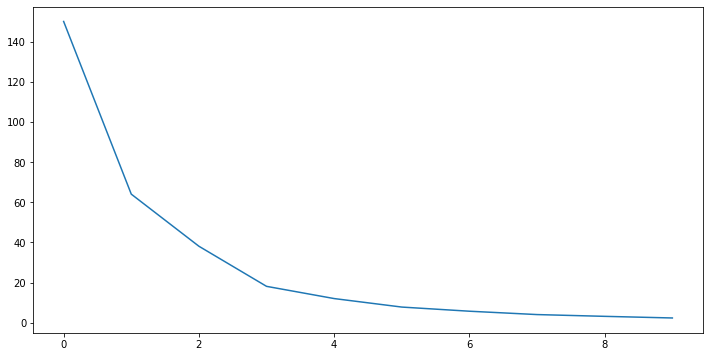

In [84]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 5 cluster (n_cluster = 5)

## 2.5 Pilih Jumlah Cluster

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [86]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

## 2.6 Plot Cluster

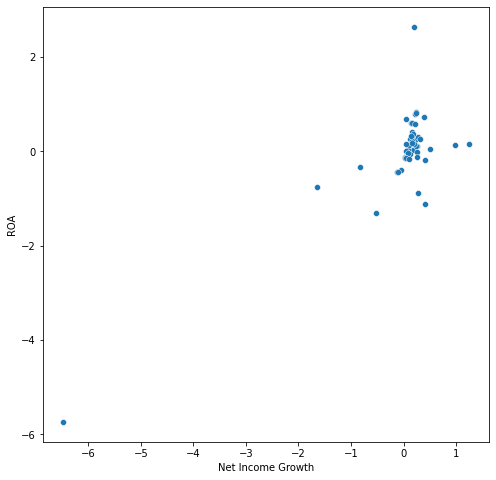

In [55]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='Net Income Growth', y='ROA', hue=new_df.target.to_list(), data=new_df);

In [29]:
new_df.head(5)

,Net Income Growth,ROA,ROE,target,fit
0,-0.832417,-0.321358,-0.365006,NaN,2
1,0.078719,0.044007,0.029071,NaN,0
2,0.221724,0.247128,0.347006,NaN,0
3,0.176293,0.025142,-0.048315,NaN,0
4,0.246201,0.106264,0.156804,NaN,0


Assign `fit` to `Category` to create correct colour indicator

In [87]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 3
new_df.loc[new_df['fit'] == 1, 'Category'] = 0
new_df.loc[new_df['fit'] == 2, 'Category'] = 2
new_df.loc[new_df['fit'] == 3, 'Category'] = 4
new_df.loc[new_df['fit'] == 4, 'Category'] = 1
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,Net Income Growth,ROA,ROE,target,fit
0,2,-0.832417,-0.321358,-0.365006,NaN,2
1,3,0.078719,0.044007,0.029071,NaN,0
2,3,0.221724,0.247128,0.347006,NaN,0
3,3,0.176293,0.025142,-0.048315,NaN,0
4,3,0.246201,0.106264,0.156804,NaN,0


Adjust column name to `(St.)` = Standardized

In [88]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','Net Income Growth(St.)','ROA(St.)','ROE(St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                50 non-null     int32  
 1   Net Income Growth(St.)  50 non-null     float64
 2   ROA(St.)                50 non-null     float64
 3   ROE(St.)                50 non-null     float64
dtypes: float64(3), int32(1)
memory usage: 1.5 KB


### 2.6.1 3D Scatter Plot

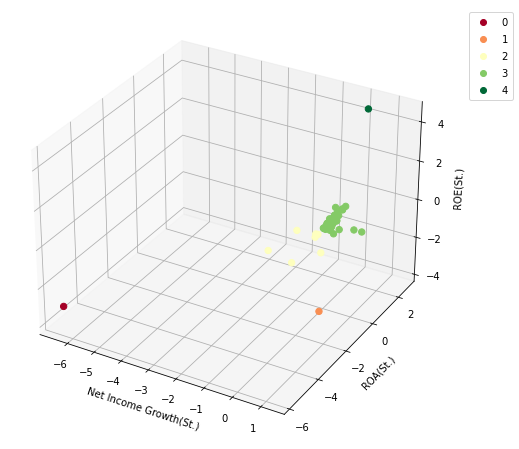

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['Net Income Growth(St.)']
y = new_df['ROA(St.)']
z = new_df['ROE(St.)']

ax.set_xlabel("Net Income Growth(St.)")
ax.set_ylabel("ROA(St.)")
ax.set_zlabel("ROE(St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### 2.6.2 X vs Z View

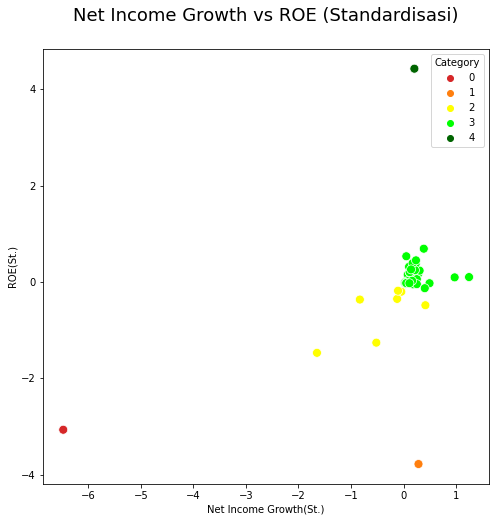

In [90]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='Net Income Growth(St.)', y='ROE(St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Net Income Growth vs ROE (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.6.3 Y vs Z View

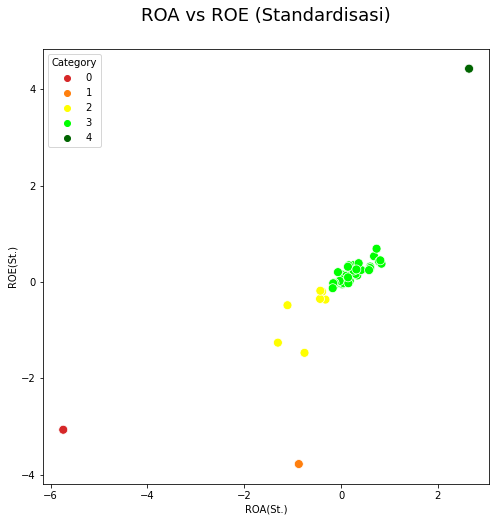

In [91]:
sns.scatterplot(x='ROA(St.)', y='ROE(St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("ROA vs ROE (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.6.4 X vs Y View

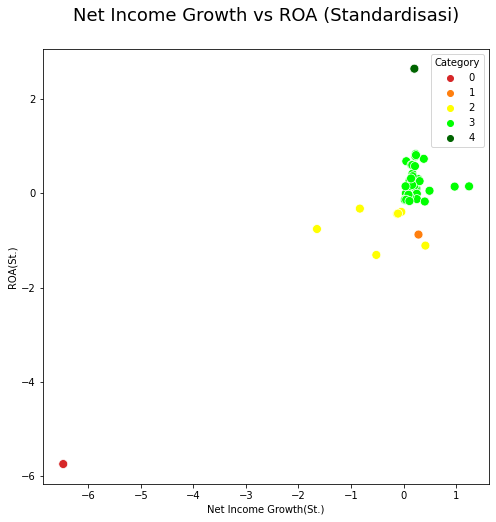

In [92]:
sns.scatterplot(x='Net Income Growth(St.)', y='ROA(St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Net Income Growth vs ROA (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3. Export Result

Adjust <b>Initial Data</b> `df0`:<br>
Delete outlier `ATIC` and other column other than `Emiten`, `DER`,`Operating Profit Margin`,`Sales Growth`.

In [93]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emiten'] == 'ATIC' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category",
         "PER (X)",
          "PBV (X)",
          "EV/EBTIDA (X)",
          "BVPS",
          "DER (X)",
          "Operating Profit Margin",
          "Operating Income Growth",
          "Sales Growth",
          "Gross Profit Margin",
          "Net Profit Margin",
          "Total Sales",
          "Gross Profit",
          "Operating Profit",
          "Income Before Tax",
          "Net Income",
          "Cash Equivalents",
          "Current Assets",
          "Fixed Assets",
          "Total Assets",
          "Current Liabilities",
          "Long Term Debt",
          "Minority Interest",
          "Total Liabilities",
          "Total Equity",
          "EPS",
          "Outstanding Shares",
          "Cash From Operating Act",
          "Cash From Investing Act",
          "Cash From Financing Act"
         ], axis=1, inplace=True)

Concat <b>Industry Emiten List</b> `dftemp`, <b>Result</b> `new_df` and <b>Initial Data</b> `df0`

In [94]:
dftemp = pd.read_excel('industry-emiten-list.xlsx')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Industri,Company,Category,Net Income Growth(St.),ROA(St.),ROE(St.),Emiten,ROA,ROE,Net Income Growth
0,Minyak & Gas,Perusahaan Gas Negara Tbk.,2,-0.832417,-0.321358,-0.365006,PGAS,-2.33,-8.96,-497.52
1,Batu Bara,Adaro Energy Tbk.,3,0.078719,0.044007,0.029071,ADRO,3.48,3.72,-63.12
2,"Pendukung Minyak, Gas & Batu Bara",Petrosea Tbk.\n,3,0.221724,0.247128,0.347006,PTRO,6.71,13.95,5.06
3,Barang Kimia,Barito Pacific Tbk.,3,0.176293,0.025142,-0.048315,BRPT,3.18,1.23,-16.60
4,Material Konstruksi,Semen Indonesia (Persero) Tbk.,3,0.246201,0.106264,0.156804,SMGR,4.47,7.83,16.73


In [64]:
df.to_excel('result.xlsx', index = False)

# 4. Get Centroid

In [69]:
np.transpose(kmeans.cluster_centers_)

array([[ 0.22116402, -6.47529121, -0.40840372,  0.20460826,  0.28294831],
       [ 0.21746156, -5.73706611, -0.67639215,  2.64495587, -0.87160703],
       [ 0.16825677, -3.06480983, -0.61603325,  4.42266144, -3.77588962]])

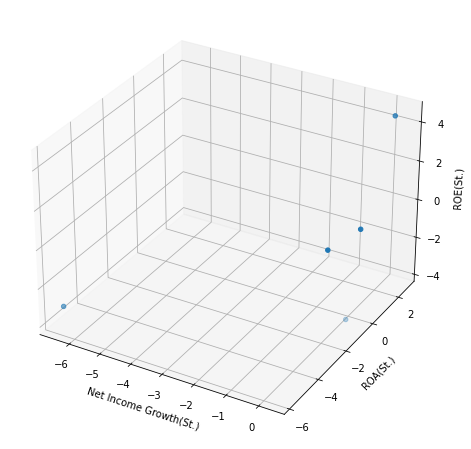

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.22116402, -6.47529121, -0.40840372,  0.20460826,  0.28294831]
y = [ 0.21746156, -5.73706611, -0.67639215,  2.64495587, -0.87160703]
z = [ 0.16825677, -3.06480983, -0.61603325,  4.42266144, -3.77588962]

ax.set_xlabel("Net Income Growth(St.)")
ax.set_ylabel("ROA(St.)")
ax.set_zlabel("ROE(St.)")
ax.scatter(x, y, z)
plt.show()

# 5. Cluster Description

In [95]:
#Highly Positively Impacted
df[df['Category'] == 4]

,Industri,Company,Category,Net Income Growth(St.),ROA(St.),ROE(St.),Emiten,ROA,ROE,Net Income Growth
18,Produk Perawatan Tubuh,Unilever Indonesia Tbk.,4,0.204608,2.644956,4.422661,UNVR,44.84,145.09,-3.1


In [96]:
#Positively Impacted
df[df['Category'] == 3]

,Industri,Company,Category,Net Income Growth(St.),ROA(St.),ROE(St.),Emiten,ROA,ROE,Net Income Growth
1,Batu Bara,Adaro Energy Tbk.,3,0.078719,0.044007,0.029071,ADRO,3.48,3.72,-63.12
2,"Pendukung Minyak, Gas & Batu Bara",Petrosea Tbk.\n,3,0.221724,0.247128,0.347006,PTRO,6.71,13.95,5.06
3,Barang Kimia,Barito Pacific Tbk.,3,0.176293,0.025142,-0.048315,BRPT,3.18,1.23,-16.60
4,Material Konstruksi,Semen Indonesia (Persero) Tbk.,3,0.246201,0.106264,0.156804,SMGR,4.47,7.83,16.73
5,Wadah & Kemasan,Fajar Surya Wisesa Tbk.,3,0.077859,0.023255,0.153075,FASW,3.15,7.71,-63.53
6,Logam & Mineral,Aneka Tambang Tbk.,3,1.244947,0.150284,0.101173,ANTM,5.17,6.04,492.90
7,Perhutanan & Kertas,Indah Kiat Pulp & Paper Tbk.,3,0.229463,0.108780,0.128523,INKP,4.51,6.92,8.75
8,Produk & Perlengkapan Bangunan,Mulia Industrindo Tbk,3,0.092499,-0.042775,-0.022520,MLIA,2.10,2.06,-56.55
9,Kelistrikan,Supreme Cable Manufacturing & Commerce Tbk.,3,0.156975,0.335797,0.135360,SCCO,8.12,7.14,-25.81
10,Mesin,United Tractors Tbk.,3,0.112677,0.267251,0.209016,UNTR,7.03,9.51,-46.93


In [78]:
#Neutral Impacted
df[df['Category'] == 2]

,Industri,Company,Category,Net Income Growth(St.),ROA(St.),ROE(St.),Emiten,ROA,ROE,Net Income Growth
0,Minyak & Gas,Perusahaan Gas Negara Tbk.,2,-0.832417,-0.321358,-0.365006,PGAS,-2.33,-8.96,-497.52
27,Ritel Khusus,Mitra Adiperkasa Tbk.,2,-0.043584,-0.390532,-0.202465,RALS,-3.43,-3.73,-121.43
28,Peralatan & Perlengkapan Kesehatan,Itama Ranoraya Tbk.,2,-0.123057,-0.432666,-0.351332,MAPI,-4.10,-8.52,-159.32
37,Aplikasi & Jasa Internet,PT M Cash Integrasi,2,-0.519434,-1.303631,-1.258829,LPKR,-17.95,-37.72,-348.30
43,Konstruksi Bangunan,Waskita Karya (Persero) Tbk.,2,-1.648307,-0.754011,-1.469853,WSKT,-9.21,-44.51,-886.51
47,Utilitas Gas,Himalaya Energi Perkasa Tbk.,2,0.414186,-1.105541,-0.482484,HADE,-14.80,-12.74,96.82
48,Pengangkutan Darat Penumpang,Blue Bird Tbk.,2,-0.106214,-0.427006,-0.182264,BIRD,-4.01,-3.08,-151.29


In [79]:
#Negatively Impacted
df[df['Category'] == 1]

,Industri,Company,Category,Net Income Growth(St.),ROA(St.),ROE(St.),Emiten,ROA,ROE,Net Income Growth
26,Department Store,Ramayana Lestari Sentosa Tbk.,1,0.282948,-0.871607,-3.77589,MKNT,-11.08,-118.71,34.25


In [80]:
#Highly Negatively Impacted
df[df['Category'] == 0]

,Industri,Company,Category,Net Income Growth(St.),ROA(St.),ROE(St.),Emiten,ROA,ROE,Net Income Growth
23,Media,PT Media Nusantara Citra Tbk,0,-6.475291,-5.737066,-3.06481,YELO,-88.45,-95.83,-3187.86
